### 贪心算法

假设1元、2元、5元、10元、20元、50元、100元的纸币分别有c0, c1, c2, c3, c4, c5, c6张。现在要用这些钱来支付K元，**至少**要用多少张纸币？

贪心算法的思路是每一步都取当前利益最大的行动，即选择面额最大的纸币！

In [1]:
counts = [3, 0, 2, 1, 0, 3, 5]
values = [1, 2, 5, 10, 20, 50, 100]

# 定义函数
def greedy_algorithm(counts, valus, money):
    # 判断是否输入正整数
    if len(counts) != len(values) or money <= 0:
        print("输入错误")
        return
    
    # 主体部分
    num = 0  # 记录最少纸币数量
    for i in range(len(values))[::-1]:
        c = money // values[i]  # 计算当前面值的纸币数量
        if c > counts[i]:
            c = counts[i]
        money -= c * values[i]
        num += c
        print("面值为%d的纸币%d张" % (values[i], c))
        if money == 0:
            print("最少纸币数量为%d" % num)
            return
        
    
if __name__ == '__main__':
    greedy_algorithm(counts, values, 300)

面值为100的纸币3张
最少纸币数量为3


###  $\epsilon$-贪婪算法

假设有K个老虎机，每一个臂（action)的回报都不是固定的，但是你并不知道他的回报是多少，你如何在T个回合内最大自己的回报呢？

C:\Users\86151\AppData\Local\Temp\ipykernel_8784\3730709888.py:79: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  avg_outcome_eps0p0 /= np.float(Nexp)
C:\Users\86151\AppData\Local\Temp\ipykernel_8784\3730709888.py:80: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  avg_outcome_eps0p01 /= np.float(Nexp)
C:\Users\86151\AppData\Local\Temp\ipyke

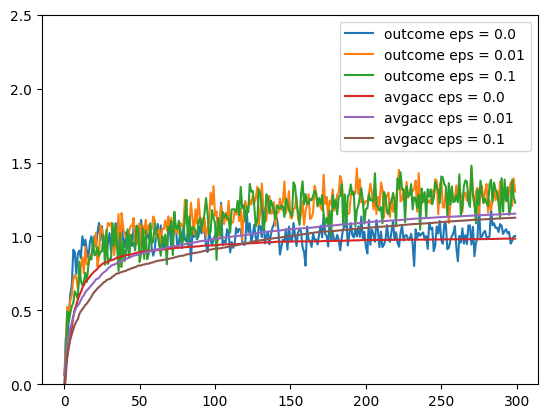

In [2]:
import numpy as np
import matplotlib.pyplot as plt 


# 定义老虎机
class Bandit:
    def __init__(self):
        self.k = 10;  # 老虎机的臂的数量
        self.arm_nums = np.zeros(10)  # 老虎机的臂的被选择次数
        self.arm_values = np.random.normal(0, 1, self.k)  # 老虎机的臂的价值
        self.est_values = np.zeros(10) # 老虎机的臂的价值的估计值
    
    # 定义回报
    def get_reward(self, action):
        reward = np.random.normal(self.arm_values[action], 1)
        return reward
    
    # 选择动作
    def choose_eps_action(self, epsilon):
        rand_num = np.random.random()
        if epsilon > rand_num:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.est_values)
    
    # 更新价值
    def update_est(self, action, reward):
        # 这里的reward指的是当前摇臂action获得的随机回报
        self.arm_nums[action] += 1  # 更新摇臂action的被选择次数
        self.est_values[action] = (reward + (self.arm_nums[action] - 1) * self.est_values[action]) / self.arm_nums[action] # 更新摇臂action的价值的估计值


# 定义实验函数
def experiment(bandit,Npulls,epsilon):
    # Npulls指的是摇臂的次数
    # epsilon指的是探索概率
    step_rewards = np.zeros(Npulls)  # 记录每一步的回报
    avg_rewards = np.zeros(Npulls)  # 记录每一步的平均回报
    for i in range(Npulls):
        action = bandit.choose_eps_action(epsilon)
        reward = bandit.get_reward(action)
        bandit.update_est(action, reward)
        step_rewards[i] = reward
        avg_rewards[i] = np.mean(step_rewards[:i+1])
    return step_rewards, avg_rewards


# 开始实验
## 进行多次实验取平均的step_reward 和avgacc_reward
## epsilon 分别取0 / 0.01 / 0.1 ,比较性能

Nexp = 200            # 试验次数
Npulls = 300          #  摇臂次数
avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
avg_avgacc_eps0p0 = np.zeros(Npulls)
avg_avgacc_eps0p01 = np.zeros(Npulls)
avg_avgacc_eps0p1 = np.zeros(Npulls)

for i in range(Nexp):
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0+= step_reword
    avg_avgacc_eps0p0 += avgacc_reword
    
    
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p01+= step_reword
    avg_avgacc_eps0p01 += avgacc_reword
    
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p1+= step_reword
    avg_avgacc_eps0p1 += avgacc_reword

#多次实验求平均    
avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)
avg_avgacc_eps0p0 /= np.float(Nexp)
avg_avgacc_eps0p01 /= np.float(Nexp)
avg_avgacc_eps0p1 /= np.float(Nexp)

plt.plot(avg_outcome_eps0p0,label = "outcome eps = 0.0")
plt.plot(avg_outcome_eps0p01,label = "outcome eps = 0.01")
plt.plot(avg_outcome_eps0p1,label = "outcome eps = 0.1")

plt.plot(avg_avgacc_eps0p0,label = "avgacc eps = 0.0")
plt.plot(avg_avgacc_eps0p01,label = "avgacc eps = 0.01")
plt.plot(avg_avgacc_eps0p1,label = "avgacc eps = 0.1")
plt.ylim(0,2.5)
plt.legend()
plt.show()

In [1]:
class Node():
    def __init__(self,data):
        self.data = data  # 节点存储的数据
        self.left = None  # 左子树
        self.right = None  # 右子树
    
    # 插入左子树
    def insertLeft(self, node):
        # 这里node是一个节点的数据，而不是一个节点
        # 判断左子树是否为空,如果为空则插入
        if self.left == None:
            self.left = Node(node)
        # 如果不为空,则将原来的左子树放在插入的节点的左子树
        else:
            t = Node(node)
            t.left = self.left
            self.left = t
    
    # 插入右子树
    def insertRight(self, node):
        # 判断右子树是否为空,如果为空则插入
        if self.right == None:
            self.right = Node(node)
        # 如果不为空,则将原来的右子树放在插入的节点的右子树
        else:
            t = Node(node)
            t.right = self.right
            self.right = t
    
    # 获取右子树
    def getRight(self):
        return self.right
    
    # 获取左子树
    def getLeft(self):
        return self.left

    # 获得当前节点中存储参数val中的对象
    def getRootValue(self):
        return self.data
    
    # 设置当前节点中存储的参数val
    def setRootValue(self, val):
        return self.data


if __name__ == '__main__':
    tree = Node('a')
    tree.insertLeft('b')
    tree.insertRight('c')
    print(tree.getRootValue())
    print(tree.getLeft().getRootValue())
    print(tree.getRight().getRootValue())
    tree.insertLeft('d')
    print(tree.getLeft().getRootValue())
    tree.getLeft().insertRight('e')
    print(tree.getLeft().getRight().getRootValue())

a
b
c
d
e


In [1]:
# 栈
# 此时认为列表的尾部为栈的顶部
class Stack:
    def __init__(self):
        self.items = []
  
    def isEmpty(self):
        return self.items == []
  
    def push(self, item): 
        self.items.append(item)
    
    def pop(self):
        return self.items.pop()
  
    def peek(self):
        return self.items[len(self.items)-1]
  
    def size(self):
        return len(self.items)

In [2]:
# 构造解析树
def buildParseTree(fpexp):
    fplist = fpexp.split()  # 将字符串转换为列表
    pStack = Stack()  # 运算符栈
    eTree = Node('')  # 表达式树
    pStack.push(eTree)  # 将表达式树压入栈中
    currentTree = eTree  # 当前树
    for  i in fplist:
        if i == '(':  # 如果是左括号,则将当前树的左子树设置为空,并将当前树压入栈中
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeft()
        if i in '+-/*':  # 如果是运算符,则将当前树的根节点设置为运算符,并将当前树的右子树设置为空,并将当前树压入栈中
            currentTree.setRootValue(i)
            currentTree.insertRight('')
            pStack.push(currentTree)
            currentTree = currentTree.getRight()
        if i not in '+-*/()':  # 如果是数字,则将当前树的根节点设置为数字,并返回到当前树的根节点
            currentTree.setRootValue(int(i))
            parent = pStack.pop()
            currentTree = parent
        if i == ')':
            currentTree = pStack.pop()
        else:
            raise ValueError
    return eTree

In [ ]:
# 构建二叉堆
class BinaryHeap():
    def __init__(self):
        self.heapList = [0]  # 二叉堆的存储列表
        self.currentSize = 0  # 二叉堆的大小
    
    def percUp(self, i):
        # 从i开始向上调整,使得二叉堆满足堆的性质,即父节点的值小于子节点的值
        while i // 2 > 0:
            if self.heaplist[i] < self.heaplist[i//2]:
                tmp = self.heaplist[i//2]
                self.heaplist[i//2] = self.heaplist[i]
                self.heaplist[i] = tmp
            i = i // 2
    
    def insert(self, k):
        # 插入元素,并调整二叉堆
        self.heapList.append(k)
        self.currentSize += 1
        self.percUp(self.currentSize)
        
    def percDown(self, i):
        # 从i开始向下调整,使得二叉堆满足堆的性质,即父节点的值小于子节点的值
        while i * 2 <= self.currentSize:
            mc = self.MinChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc
    
    def MinChild(self, i):
        # 找到i节点的最小子节点
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1
    
    def delMin(self):
        # 删除最小元素,并调整二叉堆
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize -= 1
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self, alist):
        # 从alist中构建二叉堆
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while i > 0:
            self.percDown(i)
            i -= 1

In [5]:
# 实现最大堆
class MaxHeap():
    def __init__(self):
        self.heaplist = [0]  # 二叉堆的存储列表
        self.currentSize = 0  # 二叉堆的大小
    
    def percUp(self, i):
        # 从i开始向上调整,使得二叉堆满足堆的性质,即父节点的值大于子节点的值
        while i // 2 > 0:
            if self.heaplist[i] > self.heaplist[i//2]:  # 这里与最小堆区别
                tmp = self.heaplist[i//2]
                self.heaplist[i//2] = self.heaplist[i]
                self.heaplist[i] = tmp
            i = i // 2
    
    def insert(self, k):
        # 插入元素,并调整二叉堆
        self.heaplist.append(k)
        self.currentSize += 1
        self.percUp(self.currentSize)
    
    def percDown(self, i):
        # 从i开始向下调整,使得二叉堆满足堆的性质,即父节点的值大于子节点的值
        while i * 2 <= self.currentSize:
            mc = self.getMaxChild(i)
            if self.heaplist[i] < self.heaplist[mc]:
                tmp = self.heaplist[i]
                self.heaplist[i] = self.heaplist[mc]
                self.heaplist[mc] = tmp
            i = mc
    
    def getMaxChild(self, i):
        # 找到i节点的最大子节点
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heaplist[i*2] > self.heaplist[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1
    
    def delMax(self):
        # 删除最大元素,并调整二叉堆
        retval = self.heaplist[1]
        self.heaplist[1] = self.heaplist[self.currentSize]
        self.currentSize -= 1
        self.heaplist.pop()
        self.percDown(1)
        return retval
    
    def buildHeap(self, alist):
        # 从alist中构建二叉堆
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heaplist = [0] + alist[:]
        while i > 0:
            self.percDown(i)
            i -= 1

In [3]:
# 实现堆排序
# 实现最大堆
class MaxHeap():
    def __init__(self):
        self.heaplist = [0]  # 二叉堆的存储列表
        self.currentSize = 0  # 二叉堆的大小
    
    def percDown(self, i):
        # 从i开始向下调整,使得二叉堆满足堆的性质,即父节点的值大于子节点的值
        while i * 2 <= self.currentSize:
            mc = self.getMaxChild(i)
            if self.heaplist[i] < self.heaplist[mc]:
                tmp = self.heaplist[i]
                self.heaplist[i] = self.heaplist[mc]
                self.heaplist[mc] = tmp
            i = mc
    
    def getMaxChild(self, i):
        # 找到i节点的最大子节点
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heaplist[i*2] > self.heaplist[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1
    
    def delMax(self):
        # 删除最大元素,并调整二叉堆
        retval = self.heaplist[1]
        self.heaplist[1] = self.heaplist[self.currentSize]
        self.currentSize -= 1
        self.heaplist.pop()
        self.percDown(1)
        return retval
    
    def buildHeap(self, alist):
        # 从alist中构建二叉堆
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heaplist = [0] + alist[:]
        while i > 0:
            self.percDown(i)
            i -= 1

def sortHeap(alist, reverse=False):
    # 堆排序
    if len(alist) <= 1:
        return alist  # 如果列表长度小于等于1,则直接返回
    maxheap = MaxHeap()
    maxheap.buildHeap(alist)
    if reverse:
        for i in range(len(alist)):
            alist[i] = maxheap.delMax()
    else:
        for i in range(len(alist)):
            alist[len(alist)-1-i] = maxheap.delMax()
    return alist

if __name__ == '__main__':
    print(sortHeap([1, 3, 5, 7, 9, 2, 4, 6, 8, 0], reverse=True))
    print(sortHeap([1, 3, 5, 7, 9, 2, 4, 6, 8]))
    

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# 实现二叉搜索树

# 定义BinarySearchTree类
class BinarySearchTree():
    def __init__(self):
        self.root = None  # 二叉搜索树的根节点
        self.size = 0
        
    def length(self):
        return self.size
    
    def __len__(self):
        return self.size
    
    def __iter__(self):
        return self.root.__iter__()
    
    def put(self, key, val):
        # 插入键值对,如果没有根节点,则将插入的键值对作为根节点,否则调用_put函数
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = TreeNode(key, val)
        self.size += 1
    
    def _put(self, key, val, currentNode):
        # 插入键值对,如果当前节点的键值大于插入的键值,则将插入的键值对插入到左子树,否则插入到右子树
        if key < currentNode.key:
            # 小于当前节点的键值，插入左子树
            if currentNode.hasLeftChild():
                # 如果有左子树，调用函数
                self._put(key, val, currentNode.leftChild)
            else:
                # 如果没有左子树，则插入
                currentNode.leftChild = TreeNode(key, val, parent=currentNode)
        elif key > currentNode.key:
            # 大于当前节点的键值，插入右子树
            if currentNode.hasRightChild():
                # 如果有右子树，调用函数
                self._put(key, val, currentNode.rightChild)
            else:
                # 如果没有右子树，则插入
                currentNode.rightChild = TreeNode(key, val, parent=currentNode)
        else:
            # 重复键值处理，更新值
            currentNode.value = val
    
    def __setitem__(self, k, v):
        # 重载[]操作符
        self.put(k, v)
        
    def get(self, key):
        # 获取键值对
        if self.root:
            res = self._get(key, self.root)
            if res:
                return res.value
            else:
                return None
        else:
            return None
    
    def _get(self, key, currentNode):
        # 获取键值对
        if not currentNode:
            return None
        if key == currentNode.key:
            return currentNode
        if key < currentNode.key:
            return self._get(key, currentNode.leftChild)
        else:
            return self._get(key, currentNode.rightChild)
        
    def __getitem__(self, key):
        # 重载[]操作符
        return self.get(key)
    
    def __contains__(self, key):
        # 判断键值对是否存在
        if self._get(key, self.root):
            return True
        else:
            return False
    
    def delete(self, key):
        # 删除键值对
        if self.size > 1:
            currentNode = self._get(key, self.root)
            if currentNode:
                self.remove(currentNode)
                self.size -= 1
            else:
                raise KeyError('Error, key not in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size -= 1
        else:
            raise KeyError('Error, key not in tree')
    
    def __delitem__(self, key):
        # 重载[]操作符
        self.delete(key)
    
    def remove(self, currentNode):
        # 删除节点
        if currentNode.isLeaf():
            # 叶节点
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        elif currentNode.hasBothChildren():
            # 有两个子节点
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.key = succ.key
            currentNode.value = succ.value
        else:
            # 只有一个子节点
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.key, currentNode.leftChild.value, currentNode.leftChild.leftChild, currentNode.leftChild.rightChild)
            else:
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.key, currentNode.rightChild.value, currentNode.rightChild.leftChild, currentNode.rightChild.rightChild)

    def findSuccessor(self):
        # 找到后继节点
        succ = None
        if self.hasRightChild():
            succ = self.rightChild.findMin()
        else:
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ
    
    def findMin(self):
        # 找到最小节点
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current
    
    def spliceOut(self):
        # 删除节点
        if self.isLeaf():
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild
                else:
                    self.parent.rightChild = self.leftChild
                self.leftChild.parent = self.parent
            else:
                if self.isLeftChild():
                    self.parent.leftChild = self.rightChild
                else:
                    self.parent.rightChild = self.rightChild
                self.rightChild.parent = self.parent
                

# 定义TreeNode类
class TreeNode():
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key  # 键
        self.value = val  # 节点的值
        self.leftChild = left  # 左子树
        self.rightChild = right  # 右子树
        self.parent = parent

    def hasLeftChild(self):
        # 判断是否有左子树
        return self.leftChild
    
    def hasRightChild(self):
        # 判断是否有右子树
        return self.rightChild
    
    def isLeftChild(self):
        # 判断是否为左子树,如果父节点不为空,且当前节点为父节点的左子树,则返回True
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        # 判断是否为右子树,如果父节点不为空,且当前节点为父节点的右子树,则返回True
        return self.parent and self.parent.rightChild == self
    
    def isRoot(self):
        # 判断是否为根节点
        return not self.parent
    
    def isLeaf(self):
        # 判断是否为叶节点
        return not (self.rightChild or self.leftChild)
    
    def hasAnyChildren(self):
        # 判断是否有子节点
        return self.rightChild or self.leftChild
    
    def hasBothChildren(self):
        # 判断是否有两个子节点
        return self.rightChild and self.leftChild
    
    def replaceNodeData(self, key, value, lc, rc):
        # 替换节点数据
        self.key = key
        self.value = value
        self.leftChild = lc
        self.rightChild = rc
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self